In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load the diabetes dataset
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
num_features = X.shape[1]

X_df = pd.DataFrame(X, columns=diabetes.feature_names)
y_df = pd.DataFrame(y, columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [3]:
model1 = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None, random_state=42)
model2 = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=3, random_state=42)

model1.fit(X_df, y_df)
model2.fit(X_df, y_df)


,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [4]:
Y_pred1 = model1.predict(X_test)
Y_pred2 = model2.predict(X_test)

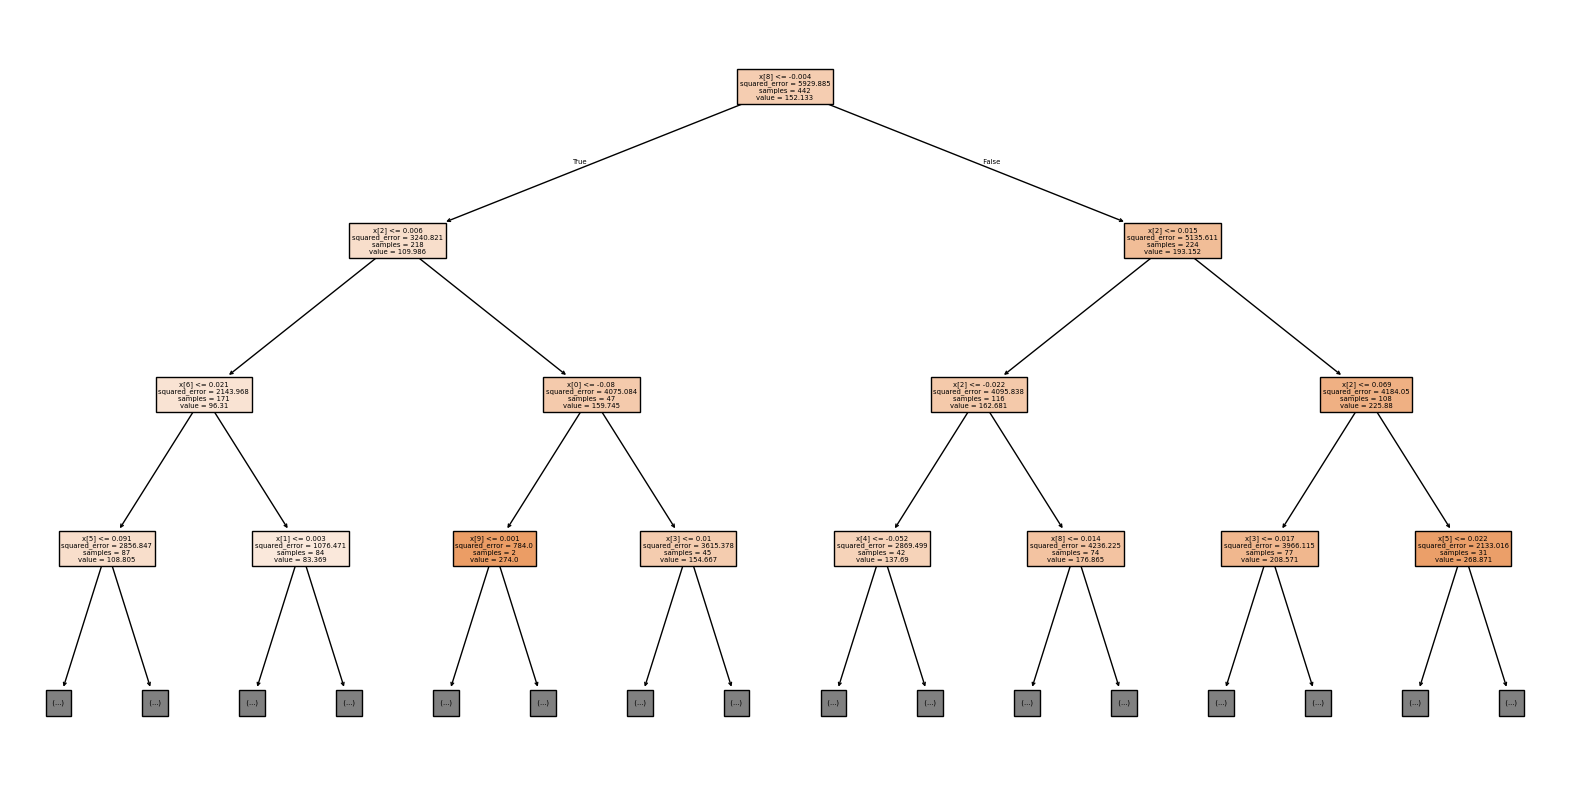

In [5]:
plt.figure(figsize=(20, 10))
plot_tree(model1, filled=True, max_depth=3)
plt.show()

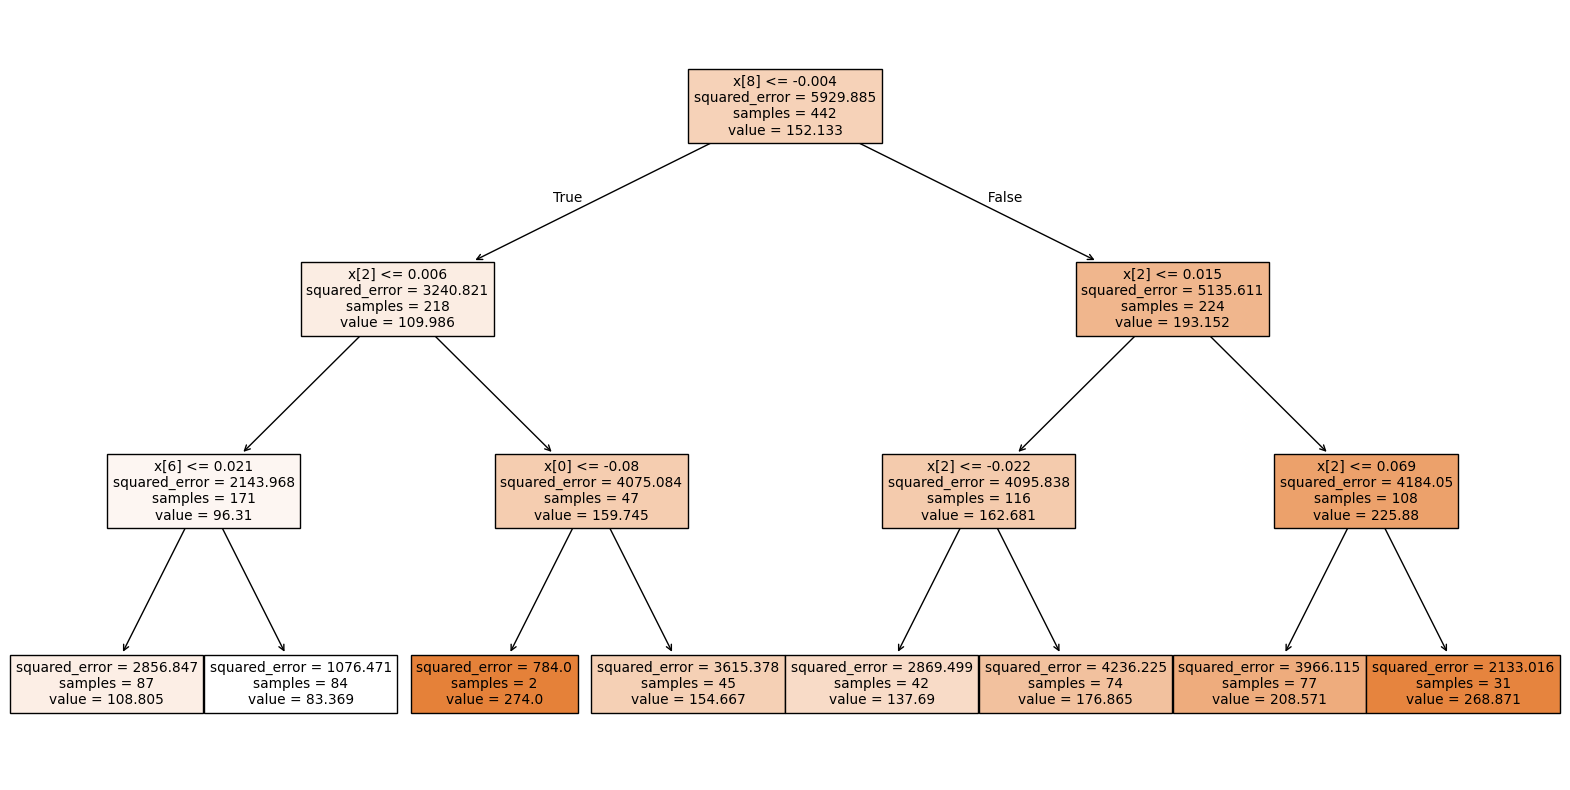

In [6]:
plt.figure(figsize=(20, 10))
plot_tree(model2, filled=True, max_depth=3)
plt.show()

In [7]:
weights = model2.feature_importances_
weights_df = pd.DataFrame(weights, index=X_df.columns, columns=['importance'])
weights_df.sort_values(by='importance', ascending=False, inplace=True)
print(weights_df)




     importance
s5     0.582301
bmi    0.375849
s3     0.021070
age    0.020780
sex    0.000000
bp     0.000000
s1     0.000000
s2     0.000000
s4     0.000000
s6     0.000000


In [8]:
# Compute the MAE
mae1 = mae(y_test, Y_pred1)
mae2 = mae(y_test, Y_pred2)

print(f"MAE for model1: {mae1}")
print(f"MAE for model2: {mae2}")


MAE for model1: 0.0
MAE for model2: 39.96403715612013


In [9]:
import graphviz
from sklearn.tree import export_graphviz
import os
import sys
# Add graphviz to the path
sys.path.append('/opt/anaconda3/envs/xai/lib/python3.13/site-packages/graphviz/')

dot_data = export_graphviz(model2, out_file=None, 
                          feature_names=X_df.columns,  
                          class_names=['0', '1'],  
                          filled=True, rounded=True,
                          special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")




'decision_tree.pdf'

153.73654390934846
[8 2 6 0 9 7 5 4 3 1]
  feature  importance
0      s5    0.582301
1     bmi    0.375849
2      s3    0.021070
3     age    0.020780
4      s6    0.000000
5      s4    0.000000
6      s2    0.000000
7      s1    0.000000
8      bp    0.000000
9     sex    0.000000


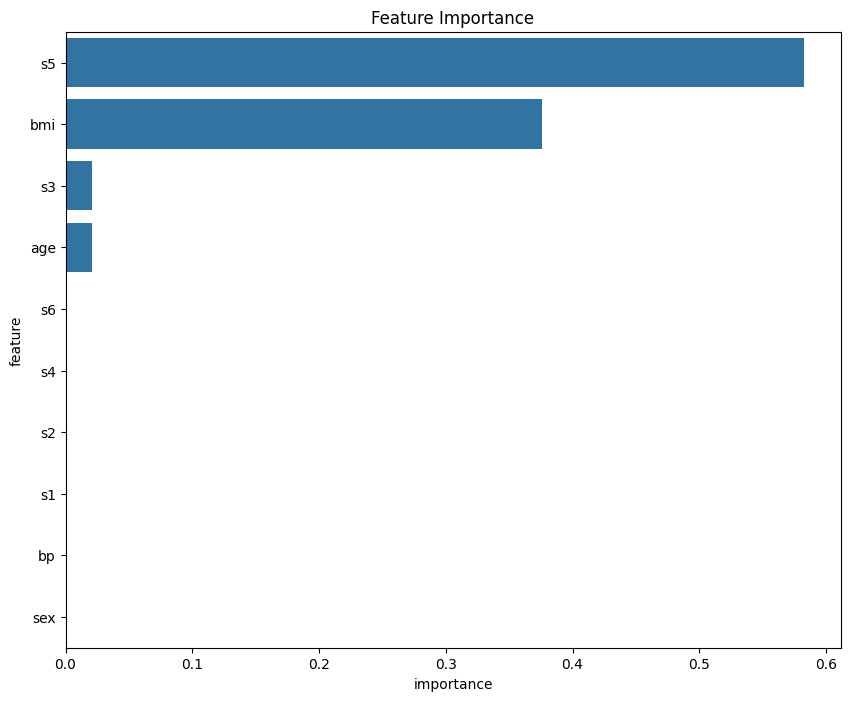

In [17]:
# Compute the mean of all training samples
import seaborn as sns
mean = np.mean(y_train)
print(mean)

weights = model2.feature_importances_
feature_importance_idx = np.argsort(np.abs(weights))[::-1]
print(feature_importance_idx)

feature_importance_df = pd.DataFrame({'feature': X_df.columns[feature_importance_idx], 'importance': weights[feature_importance_idx]})
print(feature_importance_df)

# plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df, orient='h')
plt.title('Feature Importance')
plt.show()